In [1]:
def mean_excluding_top_n(series, n):
    sorted_values = series.sort_values(ascending=False)
    top_values_excluded = sorted_values.iloc[n:]
    return top_values_excluded.mean()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

files = ["lacam", "random", "distance", "conflict", "option"]
df = {}
for i in range(len(files)):
    
    algo = files[i]
    print(f"########################## {algo} ##############################")
    fname = algo+".csv"
    df[algo] = pd.read_csv(fname)
    
    for col in df[algo].columns:
        df[algo][col] = df[algo][col].str.split(':').str[1]
        if col == "Time":
            df[algo][col] = df[algo][col].str[:-2]
    df[algo]['seed'] = range(1, len(df[algo]) + 1)
    

    col_names = [i+"_"+algo for i in df[algo].columns]
    df[algo].columns = col_names
    df[algo] = df[algo].astype(float)
    means = df[algo].mean()
    print(f"Mean values for {algo}:")
    print(means)

    mean_excluding_top_50 = df[algo].apply(lambda x: mean_excluding_top_n(x, 50))

    # Print the result
    print("Mean excluding top 50 values for each column:")
    print(mean_excluding_top_50)

########################## lacam ##############################
Mean values for lacam:
HNode_lacam         84.245667
LNode_lacam        641.719000
Time_lacam           8.222833
Makespan_lacam      55.040167
SOC_lacam         6179.955333
SOL_lacam         5401.518500
seed_lacam        3000.500000
dtype: float64
Mean excluding top 50 values for each column:
HNode_lacam         71.780672
LNode_lacam        473.620336
Time_lacam           6.389916
Makespan_lacam      54.681008
SOC_lacam         6120.165546
SOL_lacam         5351.014622
seed_lacam        2975.500000
dtype: float64
########################## random ##############################
Mean values for random:
HNode_random        265.543500
LNode_random       3088.328000
Time_random          60.769000
Makespan_random      63.540167
SOC_random         6750.946333
SOL_random         5574.698167
seed_random        3000.500000
dtype: float64
Mean excluding top 50 values for each column:
HNode_random        156.100504
LNode_random       

In [3]:
# merge dataframe
merged_df = pd.DataFrame()
for algo in files:
    merged_df = pd.concat([merged_df, df[algo]], axis = 1)
print(merged_df.shape)

(6000, 35)


In [4]:
merged_df['Agent'] = [1]*len(df[algo])
a = 50
for i in range(1, len(merged_df)+1):
    merged_df['Agent'][i-1] = a
    if i%1000 == 0:
        a += 50

/tmp/ipykernel_81273/1509049275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Agent'][i-1] = a
/tmp/ipykernel_81273/1509049275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Agent'][i-1] = a
/tmp/ipykernel_81273/1509049275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Agent'][i-1] = a
/tmp/ipykernel_81273/1509049275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [9]:
def calculate(df, algo = "distance", matric = "LNode"):
    check = matric+"_"+algo
    f = files.copy()
    f.remove(algo)
    other = []
    while len(f)!= 0:
        other.append(matric+"_"+f.pop())
    mask = (df[check]==df[check])
    for ot in other:
        mask = mask & (df[check] < df[ot]) 
    better = df[mask]
    return better

In [10]:
stat = {}

In [11]:
grouped = merged_df.groupby('Agent')
matric = "LNode"
stat[matric] = {}
for agent, data in grouped:
    print(agent, end=",")
    stat[matric][agent] = {}
    for algo in files:
        x = calculate(data, algo, matric)
        stat[matric][agent][algo] = x.shape[0]
        print(x.shape[0],end=",")
    print(matric)


50,243,116,223,130,185,LNode
100,402,124,265,80,63,LNode
150,516,66,326,42,12,LNode
200,606,52,283,37,8,LNode
250,627,58,258,41,6,LNode
300,648,73,208,58,6,LNode


In [12]:
grouped = merged_df.groupby('Agent')
matric = "HNode"
stat[matric] = {}
for agent, data in grouped:
    print(agent, end=",")
    stat[matric][agent] = {}
    for algo in files:
        x = calculate(data, algo, matric)
        stat[matric][agent][algo] = x.shape[0]
        print(x.shape[0],end=",")
    print(matric)


50,38,9,33,4,3,HNode
100,241,31,113,8,1,HNode
150,432,32,220,11,4,HNode
200,543,34,234,28,5,HNode
250,639,37,233,29,6,HNode
300,687,49,190,47,4,HNode


In [13]:
grouped = merged_df.groupby('Agent')
matric = "SOC"
stat[matric] = {}
for agent, data in grouped:
    print(agent, end=",")
    stat[matric][agent] = {}
    for algo in files:
        x = calculate(data, algo, matric)
        stat[matric][agent][algo] = x.shape[0]
        print(x.shape[0],end=",")
    print(matric)


50,282,179,242,172,112,SOC
100,455,105,356,41,37,SOC
150,559,31,401,2,3,SOC
200,608,6,371,13,0,SOC
250,595,0,400,4,0,SOC
300,672,0,326,2,0,SOC


In [14]:
for agent, data in grouped:
    print(agent)
    for algo in files:
        x = calculate(data, algo, 'Time')
        print(algo, x.shape)

50
lacam (1, 36)
random (0, 36)
distance (1, 36)
conflict (1, 36)
option (0, 36)
100
lacam (42, 36)
random (1, 36)
distance (20, 36)
conflict (1, 36)
option (1, 36)
150
lacam (256, 36)
random (0, 36)
distance (166, 36)
conflict (9, 36)
option (7, 36)
200
lacam (243, 36)
random (1, 36)
distance (154, 36)
conflict (36, 36)
option (5, 36)
250
lacam (423, 36)
random (0, 36)
distance (155, 36)
conflict (40, 36)
option (7, 36)
300
lacam (540, 36)
random (0, 36)
distance (166, 36)
conflict (60, 36)
option (11, 36)


ValueError: list.remove(x): x not in list

In [63]:
stat

{'LNode': {'lacam': 648,
  'random': 73,
  'distance': 208,
  'conflict': 58,
  'option': 6},
 'HNode': {'lacam': 687,
  'random': 49,
  'distance': 190,
  'conflict': 47,
  'option': 4},
 'SOC': {'lacam': 672,
  'random': 0,
  'distance': 326,
  'conflict': 2,
  'option': 0}}

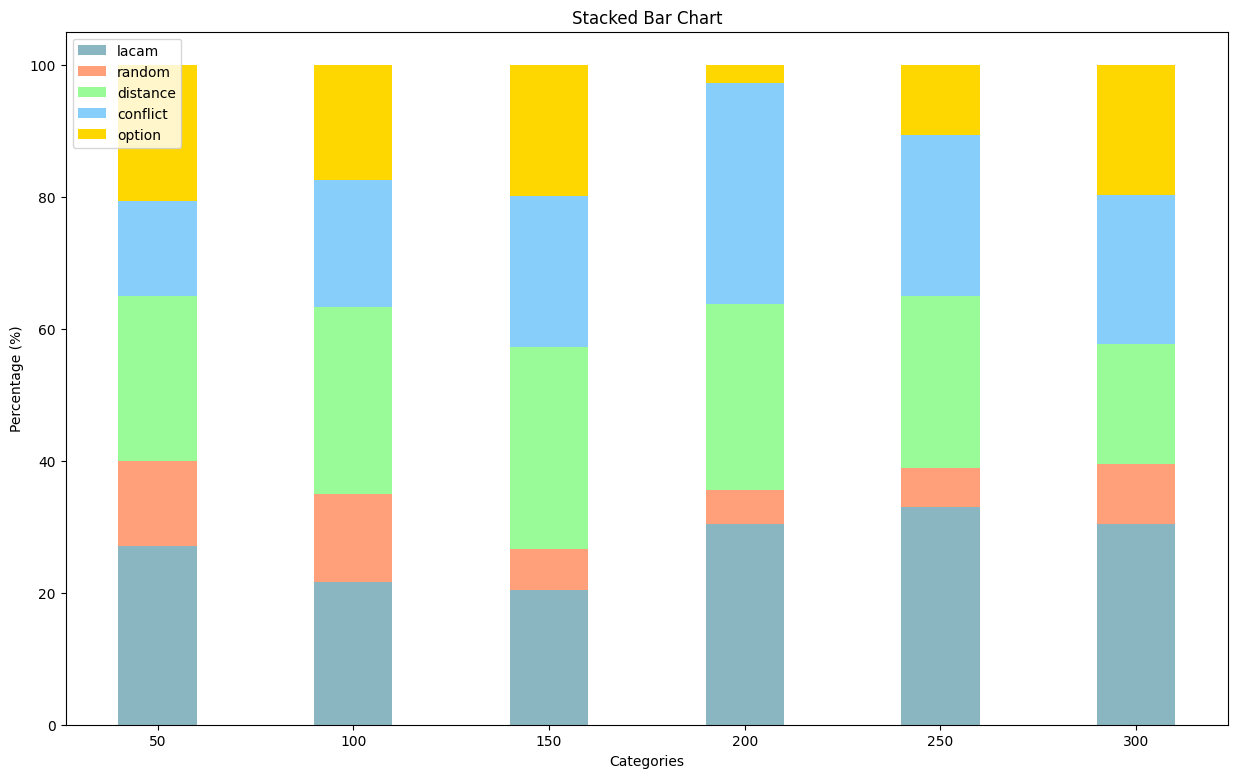

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: categories and their corresponding percentages
agents = [50, 100, 150, 200, 250, 300]
algos = ['lacam', 'random', 'distance', 'conflict', 'option']
# percentages = []
# matric = "LNode"
# for b in algos:
#     percentages.append([])
#     for a in agents:
#         percentages[-1].append(stat[matric][a][b])
# print(percentages)


values = [[243, 202, 216, 306, 327, 348], 
               [116, 124, 66, 52, 58, 103], 
               [223, 265, 326, 283, 258, 208], 
               [130, 180, 242, 337, 241, 258], 
               [185, 163, 212, 28, 106, 226]]
total_values = np.sum(values, axis=0)
percentages = [segment_values / total_values * 100 for segment_values in values]


bar_width = 20
 #Colors for each segment
# colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a stacked bar chart
plt.figure(figsize=(15, 9))
colors = ['#8AB6C1', '#FFA07A', '#98FB98', '#87CEFA', '#FFD700']  # Removed pinkish color


# Initialize a variable to keep track of the bottom position for each segment
bottom = np.zeros(len(agents))

for i, segment_percentages in enumerate(percentages):
    plt.bar(agents, segment_percentages, bottom = bottom, label = algos[i], width = bar_width, color = colors[i])
    bottom += np.array(segment_percentages)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.title('Stacked Bar Chart')

# Adding a legend
# plt.legend()
plt.legend(loc='upper left')

# Display the chart
plt.show()


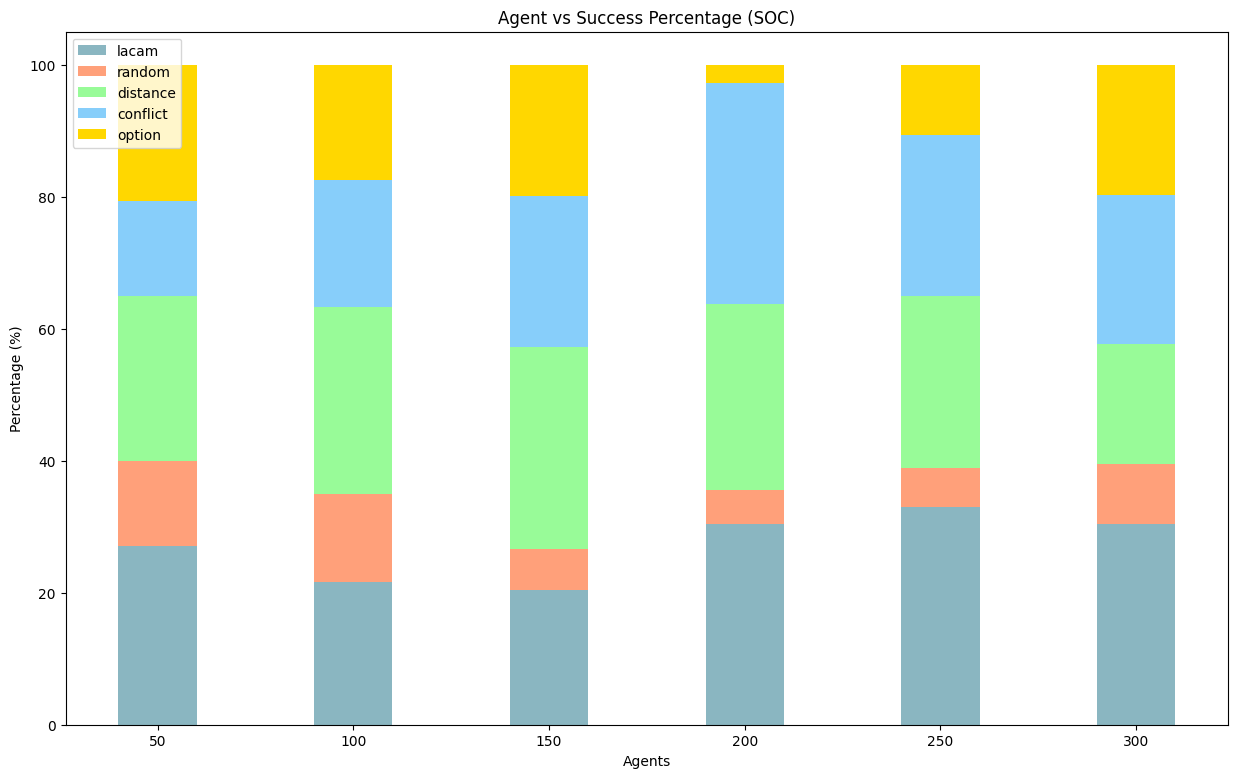

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: categories and their corresponding percentages
agents = [50, 100, 150, 200, 250, 300]
algos = ['lacam', 'random', 'distance', 'conflict', 'option']
# percentages = []
# matric = "LNode"
# for b in algos:
#     percentages.append([])
#     for a in agents:
#         percentages[-1].append(stat[matric][a][b])
# print(percentages)


values = [[243, 202, 216, 306, 327, 348], 
               [116, 124, 66, 52, 58, 103], 
               [223, 265, 326, 283, 258, 208], 
               [130, 180, 242, 337, 241, 258], 
               [185, 163, 212, 28, 106, 226]]
total_values = np.sum(values, axis=0)
percentages = [segment_values / total_values * 100 for segment_values in values]


bar_width = 20
 #Colors for each segment
# colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a stacked bar chart
plt.figure(figsize=(15, 9))
colors = ['#8AB6C1', '#FFA07A', '#98FB98', '#87CEFA', '#FFD700']  # Removed pinkish color


# Initialize a variable to keep track of the bottom position for each segment
bottom = np.zeros(len(agents))

for i, segment_percentages in enumerate(percentages):
    plt.bar(agents, segment_percentages, bottom = bottom, label = algos[i], width = bar_width, color = colors[i])
    bottom += np.array(segment_percentages)

# Adding labels and title
plt.xlabel('Agents')
plt.ylabel('Percentage (%)')
plt.title('Agent vs Success Percentage (SOC)')

# Adding a legend
# plt.legend()
plt.legend(loc='upper left')

# Display the chart
plt.show()


In [74]:
statt

{'LNode': {50: {'lacam': 243,
   'random': 116,
   'distance': 223,
   'conflict': 130,
   'option': 185},
  100: {'lacam': 402,
   'random': 124,
   'distance': 265,
   'conflict': 80,
   'option': 63},
  150: {'lacam': 516,
   'random': 66,
   'distance': 326,
   'conflict': 42,
   'option': 12},
  200: {'lacam': 606,
   'random': 52,
   'distance': 283,
   'conflict': 37,
   'option': 8},
  250: {'lacam': 627,
   'random': 58,
   'distance': 258,
   'conflict': 41,
   'option': 6},
  300: {'lacam': 648,
   'random': 73,
   'distance': 208,
   'conflict': 58,
   'option': 6}},
 'HNode': {50: {'lacam': 38,
   'random': 9,
   'distance': 33,
   'conflict': 4,
   'option': 3},
  100: {'lacam': 241,
   'random': 31,
   'distance': 113,
   'conflict': 8,
   'option': 1},
  150: {'lacam': 432,
   'random': 32,
   'distance': 220,
   'conflict': 11,
   'option': 4},
  200: {'lacam': 543,
   'random': 34,
   'distance': 234,
   'conflict': 28,
   'option': 5},
  250: {'lacam': 639,
   'rando

In [91]:
list(stat['LNode'][50].values())

[243, 116, 223, 130, 185]

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

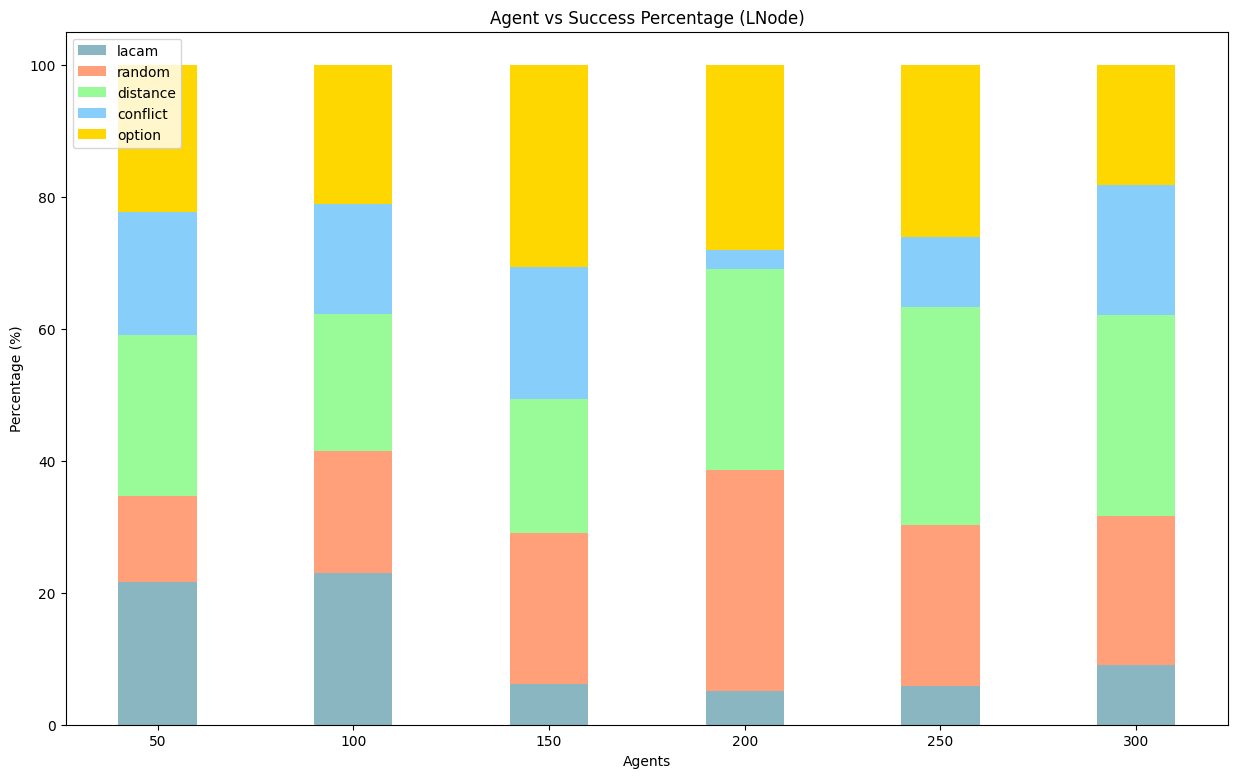

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: categories and their corresponding percentages
agents = [50, 100, 150, 200, 250, 300]
algos = ['lacam', 'random', 'distance', 'conflict', 'option']
# percentages = []
# matric = "LNode"
# for b in algos:
#     percentages.append([])
#     for a in agents:
#         percentages[-1].append(stat[matric][a][b])
# print(percentages)


values = [
               [216, 224, 66, 52, 58, 103], 
               [130, 180, 242, 337, 241, 258],
                [243, 202, 216, 306, 327, 348],
               [185, 163, 212, 28, 106, 226],
                [223, 205, 326, 283, 258, 208]]
total_values = np.sum(values, axis=0)
percentages = [segment_values / total_values * 100 for segment_values in values]


bar_width = 20
 #Colors for each segment
# colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a stacked bar chart
plt.figure(figsize=(15, 9))
colors = ['#8AB6C1', '#FFA07A', '#98FB98', '#87CEFA', '#FFD700']  # Removed pinkish color


# Initialize a variable to keep track of the bottom position for each segment
bottom = np.zeros(len(agents))

for i, segment_percentages in enumerate(percentages):
    plt.bar(agents, segment_percentages, bottom = bottom, label = algos[i], width = bar_width, color = colors[i])
    bottom += np.array(segment_percentages)

# Adding labels and title
plt.xlabel('Agents')
plt.ylabel('Percentage (%)')
plt.title('Agent vs Success Percentage (LNode)')

# Adding a legend
# plt.legend()
plt.legend(loc='upper left')

plt.save('LNode.png')
# Display the chart
plt.show()